In [68]:
#pip install streamlit -i https://pypi.org/simple/

In [1]:
#from google.colab import files

#uploaded = files.upload()

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import streamlit as st

In [3]:
df = pd.read_excel("C:/Users/AZIMUT Info/OneDrive/Desktop/repos/dataset_belinga_1_corr_1 (4).xlsx")
df.head(3)
df.shape

(402, 62)

In [4]:
df.columns

Index(['lieu', 'date', 'modercueil', 'enqueteur', 'enquete', 'num', 'age',
       'sexe', 'taille', 'vem1', 'cvf1', 'vemscvf1', 'dem2575ls1', 'texs1',
       'aex1', 'vemscv1', 'vem2', 'cvf2', 'vemscvf2', 'depls2', 'dem25ls2',
       'dem50ls2', 'dem75ls2', 'dem2575ls2', 'texs2', 'aex2', 'vemscv2',
       'cpt1', 'vr1', 'vgt1', 'vrcpt1', 'ic1', 'vgtcpt1', 'gawlskpa1',
       'srawkpa1', 'rvakpals1', 'sgawkpas1', 'cpt2', 'vr2', 'vgt2', 'vrcpt2',
       'ic2', 'vgtcpt2', 'gawlskpa2', 'srawkpa2', 'rvakpals2', 'sgawkpas2',
       'FEV1_predicted', 'FEV1FVC_predicted', 'FVC_predicted',
       'FEF2575_predicted', 'FEV1_zscore', 'FEV1FVC_zscore', 'FVC_zscore',
       'FEF2575_zscore', 'FEV1_LLN', 'FEV1FVC_LLN', 'FEV1FVC_ULN', 'FVC_LLN',
       'FEF2575_LLN', 'CPT_pred', 'LLN_CPT'],
      dtype='object')

In [5]:
df["vemscvf1"].head(2)

0    85
1    79
Name: vemscvf1, dtype: int64

In [6]:
df['LLN_CPT'].head(2)

0    4.749
1      NaN
Name: LLN_CPT, dtype: float64

In [7]:
df["vemscvf1"] = df["vemscvf1"]/100
df['LLN_CPT'] = df['LLN_CPT']* (1-0.12)

In [8]:
df['LLN_CPT'].head(2)

0    4.17912
1        NaN
Name: LLN_CPT, dtype: float64

In [9]:
((df['vemscvf1'] >= df.FEV1FVC_LLN) &(df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT)).value_counts()

False    378
True      24
Name: count, dtype: int64

In [10]:
#| (df.vemscvf1 >= df.FEV1FVC_LLN  & df.cvf1<df.FVC_LLN & df.cpt1>df.LLN_CPT)
masq_osb = ((df['vemscvf1'] < df['FEV1FVC_LLN']) & (df['cvf1'] > df['FVC_LLN'])) | ((df['vemscvf1'] >= df['FEV1FVC_LLN'])  & (df['cvf1']<df['FVC_LLN']) & (df['cpt1']>df['LLN_CPT']))
df_obs = df[masq_osb]
masq_rest = ((df['vemscvf1'] >= df.FEV1FVC_LLN) & (df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT))
df_rest = df[masq_rest]
masq_mixt = (df['vemscvf1'] < df.FEV1FVC_LLN) & (df.cvf1 < df.FVC_LLN) & (df.cpt1 < df.LLN_CPT)
df_mixt = df[masq_mixt]
masq_normaux = (df.cvf1>=df.FVC_LLN) & (df['vemscvf1'] > df.FEV1FVC_LLN)
df_normaux  = df[masq_normaux]

In [11]:
df_normaux.shape

(301, 62)

In [12]:
df_obs.shape

(56, 62)

In [13]:
df_normaux["type_trouble"] = 0
df_obs["type_trouble"] = 1
df_rest["type_trouble"] = 2
df_mixt["type_trouble"] = 3

C:\Users\AZIMUT Info\AppData\Local\Temp\ipykernel_12324\2781879157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normaux["type_trouble"] = 0
C:\Users\AZIMUT Info\AppData\Local\Temp\ipykernel_12324\2781879157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obs["type_trouble"] = 1
C:\Users\AZIMUT Info\AppData\Local\Temp\ipykernel_12324\2781879157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [14]:
df_all = pd.concat([df_normaux, df_obs, df_rest, df_mixt], axis = 0)
df_all.shape

(387, 63)

In [15]:
df_all["type_trouble"].value_counts(normalize = True)*100

type_trouble
0    77.777778
1    14.470284
2     6.201550
3     1.550388
Name: proportion, dtype: float64

In [16]:
df_analysis = pd.concat([df_normaux, df_obs, df_rest], axis = 0)
print(df_analysis.shape)
df_analysis["type_trouble"].value_counts(normalize=True)

(381, 63)


type_trouble
0    0.790026
1    0.146982
2    0.062992
Name: proportion, dtype: float64

In [17]:
#df_analysis.to_csv('C:/Users/AZIMUT Info/OneDrive/Desktop/repos/base_donnees_article_guy.csv')

In [18]:
df.shape
print(df.head(3))

                lieu       date       modercueil   enqueteur enquete  num  \
0  CLINIQUE POLYMERE 2023-04-04   FICHE RESULTAT  Dr BELINGA  JEANZU    1   
1  CLINIQUE POLYMERE 2023-04-05   FICHE RESULTAT  Dr BELINGA  MadBIM    2   
2  CLINIQUE POLYMERE 2023-04-03  FICHE RESULTATS  Dr BELINGA  DorNGU    3   

   age  sexe  taille  vem1  ...  FEV1FVC_zscore  FVC_zscore  FEF2575_zscore  \
0   80     1     167  2.19  ...            0.94        0.21           -0.61   
1   88     2     159  1.01  ...            0.08       -1.36           -4.15   
2   66     2     167  2.31  ...            1.12        0.59            0.20   

   FEV1_LLN  FEV1FVC_LLN  FEV1FVC_ULN  FVC_LLN  FEF2575_LLN  CPT_pred  LLN_CPT  
0      1.04         0.65         0.90     1.57         2.03     6.111  4.17912  
1      0.89         0.65         0.92     1.18         2.33       NaN      NaN  
2      1.24         0.68         0.93     1.56         1.73     5.346  3.76288  

[3 rows x 62 columns]


In [19]:
df.head()

,lieu,date,modercueil,enqueteur,enquete,num,age,sexe,taille,vem1,...,FEV1FVC_zscore,FVC_zscore,FEF2575_zscore,FEV1_LLN,FEV1FVC_LLN,FEV1FVC_ULN,FVC_LLN,FEF2575_LLN,CPT_pred,LLN_CPT
0,CLINIQUE POLYMERE,2023-04-04,FICHE RESULTAT,Dr BELINGA,JEANZU,1,80,1,167,2.19,...,0.94,0.21,-0.61,1.04,0.65,0.90,1.57,2.03,6.111,4.17912
1,CLINIQUE POLYMERE,2023-04-05,FICHE RESULTAT,Dr BELINGA,MadBIM,2,88,2,159,1.01,...,0.08,-1.36,-4.15,0.89,0.65,0.92,1.18,2.33,NaN,NaN
2,CLINIQUE POLYMERE,2023-04-03,FICHE RESULTATS,Dr BELINGA,DorNGU,3,66,2,167,2.31,...,1.12,0.59,0.20,1.24,0.68,0.93,1.56,1.73,5.346,3.76288
3,CLINIQUE POLYMERE,2023-04-03,FICHE RESULTATS,Dr BELINGA,CloAMI,4,35,1,187,3.00,...,0.73,-1.61,0.65,2.80,0.75,0.94,3.34,2.36,8.037,5.70152
4,CLINIQUE POLYMERE,2023-04-08,FICHE RESULTATS,Dr BELINGA,JulOKO,5,50,1,168,3.08,...,-0.32,0.94,-0.32,1.79,0.71,0.93,2.28,1.51,6.326,4.49944


In [20]:
df = pd.read_csv('C:/Users/AZIMUT Info/OneDrive/Desktop/repos/base_donnees_article_guy.csv')
df.head(2)

,Unnamed: 0,lieu,date,modercueil,enqueteur,enquete,num,age,sexe,taille,...,FVC_zscore,FEF2575_zscore,FEV1_LLN,FEV1FVC_LLN,FEV1FVC_ULN,FVC_LLN,FEF2575_LLN,CPT_pred,LLN_CPT,type_trouble
0,0,CLINIQUE POLYMERE,2023-04-04,FICHE RESULTAT,Dr BELINGA,JEANZU,1,80,1,167,...,0.21,-0.61,1.04,0.65,0.90,1.57,2.03,6.111,4.17912,0
1,1,CLINIQUE POLYMERE,2023-04-05,FICHE RESULTAT,Dr BELINGA,MadBIM,2,88,2,159,...,-1.36,-4.15,0.89,0.65,0.92,1.18,2.33,NaN,NaN,0


In [21]:
# Renommer les colonnes
df['type_trouble'] = df['type_trouble'].astype('category')
df = df.rename(columns={'vem1': 'vems', 'cvf1': 'cvf', 'vemscvf1': 'vems/cvf', 'aex1': 'aex'})

In [22]:
#print(df.head(2))

In [23]:
df = df[['vems', 'cvf', 'vems/cvf', 'aex', 'type_trouble']]
df.dtypes

vems             float64
cvf              float64
vems/cvf         float64
aex              float64
type_trouble    category
dtype: object

numerical_features = selector(dtype_exclude="category")(X)

<Axes: >

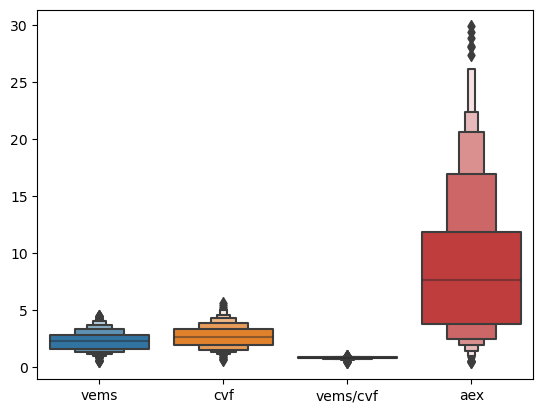

In [24]:
sns.boxenplot(df.select_dtypes(include=['float64']))

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [26]:
# Fonction d'évaluation
def evaluation(model):
    ypred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [27]:
X = df[['vems','cvf','vems/cvf','aex']]
y = df['type_trouble']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)

In [28]:
preprocessor = RobustScaler()

In [29]:
X_train = preprocessor.fit_transform(X_train)

In [30]:
RF = RandomForestClassifier (random_state=0)
RF = RF.fit(X_train, y_train)

In [31]:
scoring = {'f1': make_scorer(f1_score, average='weighted')}
cv = StratifiedKFold(n_splits = 3)

def average_score_on_cross_val_classification(clf, X, y, scoring=scoring, cv=cv):
    """
    Evaluates a given model/estimator using cross-validation
    and returns a dict containing the absolute vlues of the average (mean) scores
    for classification models.

    clf: scikit-learn classification model
    X: features (no labels)
    y: labels
    scoring: a dictionary of scoring metrics
    cv: cross-validation strategy
    """
    # Score metrics on cross-validated dataset
    scores_dict = cross_validate(clf, X, y, scoring=scoring, cv=cv, n_jobs=-1)

    # return the average scores for each metric
    return {metric: round(np.mean(scores), 3) for metric, scores in scores_dict.items()}, pd.DataFrame(scores_dict)["test_f1"]

In [32]:
average_score_on_cross_val_classification(RF, X=X_train, y=y_train)

({'fit_time': 0.112, 'score_time': 0.011, 'test_f1': 0.796},
 0    0.767815
 1    0.836095
 2    0.782898
 Name: test_f1, dtype: float64)

In [33]:
X_test = preprocessor.transform(X_test)

In [34]:
average_score_on_cross_val_classification(RF, X=X_test, y=y_test)

({'fit_time': 0.116, 'score_time': 0.009, 'test_f1': 0.81},
 0    0.845457
 1    0.737898
 2    0.846297
 Name: test_f1, dtype: float64)

[  1   7  14  20  26  32  39  45  51  57  64  70  76  83  89  95 101 108
 114 120 126 133 139 145 152]


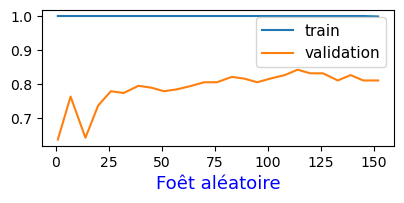

In [35]:
fig = plt.figure(figsize=(10,6))
plt.subplot(3,2,1)
N, train_score, val_score = learning_curve(RF, X_train, y_train,
                                           train_sizes = np.linspace(0.01, 1.0, 25), cv = 5)
print(N)
plt.plot(N,train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('Foêt aléatoire', color = 'b', fontsize = 13)
plt.legend(fontsize = 11)

In [42]:
import pickle
import joblib

In [44]:
# Sauvegarde du modèle
with open('Trouble_ventilatoire_predict.pkl', 'wb') as file:
    pickle.dump(Trouble_ventilatoire_predict, file)

NameError: name 'Trouble_ventilatoire_predict' is not defined

In [38]:
# Charger le modèle
model = joblib.load('RF.pkl')

In [39]:
def predict(features):
    prediction = model.predict([features])
    return prediction

In [41]:
st.title('Model Prediction')

2024-12-11 14:57:42.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-11 14:57:42.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()